# Tratamento de Dados dos Datasets FINBRA

Arquivo: [finbra_2021_tratado.csv](https://siconfi.tesouro.gov.br/siconfi/pages/public/consulta_finbra/finbra_list.jsf)

#### Observação
Antes de subir o dataset no jupyter notebook, eu exclui as duas primeiras linhas para que só restassem as colunas e seus respectivos dados. Assim, eu deixei que ocorresse um erro ao ler o arquivo '.csv' que ocorria nas primeiras vezes.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
dataset_2021 = pd.read_csv("../outros/finbra_2021_tratado.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../outros/finbra_2021_tratado.csv'

In [ ]:
dataset_2021 = dataset_2021[(dataset_2021["Conta"] == "26 - Transporte") & 
                  (dataset_2021["Coluna"] == "Despesas Pagas")][["Cod_municipio", "UF", "Valor"]]

In [ ]:
dataset_2021.head()

In [5]:
# HashMap de estados por região
regioes = {"Norte": {"PA", "RR", "AP", "AM", "TO", "RO", "AC", "MA"},
           "Nordeste": {"SE", "CE", "PB", "AL", "RN", "PE", "BA", "PI"},
           "Sudeste": {"MG", "RJ", "SP", "ES"},
           "Centro-Oeste": {"DF", "MS", "MT", "GO"},
           "Sul": {"PR", "SC", "RS"}}

### Analisando as médias de investimento das regiões em 2021

In [6]:
lista_medias = []
for regiao in regioes:
  media = int(dataset_2021[dataset_2021["UF"].isin(regioes[regiao])]["Valor"].mean())
  lista_medias.append(media)

df_medias_2021 = pd.DataFrame(lista_medias, index=regioes, columns=["media"]).sort_values(by="media", ascending=False)

In [7]:
df_medias_2021

,media
Sudeste,6844551
Centro-Oeste,3880576
Norte,3302650
Sul,3201229
Nordeste,1122277


In [8]:
dataset_2013 = pd.read_csv("../outros/finbra_2013_tratado.csv")

In [9]:
dataset_2013 = dataset_2013[(dataset_2013["Conta"] == "26 - Transporte") & 
                            (dataset_2013["Coluna"] == "Despesas Pagas")][["Cod_municipio", "UF", "Valor"]]

In [10]:
dataset_2013.head()

,Cod_municipio,UF,Valor
98,4126652.0,PR,1583648.0
259,4206652.0,SC,1582579.0
457,4310405.0,RS,413069.0
625,4322533.0,RS,1378911.0
866,4318705.0,RS,774243.0


### Analisando as médias de investimento das regiões em 2021

In [11]:
lista_medias = []
for regiao in regioes:
  media = int(dataset_2013[dataset_2013["UF"].isin(regioes[regiao])]["Valor"].mean())
  lista_medias.append(media)

df_medias_2013 = pd.DataFrame(lista_medias, index=regioes, columns=["media"]).sort_values(by="media", ascending=False)

In [12]:
df_medias_2013

,media
Sudeste,3644537
Centro-Oeste,1835748
Sul,1639701
Norte,1339501
Nordeste,469182


### Analisando o aumento em porcentagem do investimento em transporte entre 2013 e 2021

In [13]:
((df_medias_2021 - df_medias_2013) / df_medias_2013).sort_values(by="media", ascending=False)

,media
Norte,1.465582
Nordeste,1.391986
Centro-Oeste,1.113894
Sul,0.952325
Sudeste,0.878030


#### Observação
Podemos notar que as regiões Norte, Nordeste e Centro-Oeste tiveram os maiores aumentos de investimento, visto que os investimentos em 2021 mais que dobraram em relação a 2013. Sul e Sudeste tiveram um aumento menor, porém ainda sim grande.

In [14]:
df_valor_2021 = pd.DataFrame(dataset_2021[["UF", "Valor"]].values, index=dataset_2021["Cod_municipio"].values, columns=["UF", "Valor"]).sort_values(by="Valor", ascending=False)

In [15]:
df_valor_2021

,UF,Valor
3550308.0,SP,5324269999.0
1302603.0,AM,289582742.0
5208707.0,GO,280956302.0
3304557.0,RJ,279951442.0
2927408.0,BA,248418640.0
...,...,...
2911006.0,BA,71.0
2911501.0,BA,51.0
2922656.0,BA,23.0
5218789.0,GO,10.0


In [16]:
df_valor_2013 = pd.DataFrame(dataset_2013[["UF", "Valor"]].values, index=dataset_2013["Cod_municipio"].values, columns=["UF", "Valor"]).sort_values(by="Valor", ascending=False)

In [17]:
df_valor_2013

,UF,Valor
3550308.0,SP,2550654348.0
3106200.0,MG,345302536.0
3304557.0,RJ,222076641.0
3548708.0,SP,205256422.0
5002704.0,MS,169690797.0
...,...,...
2919926.0,BA,15.0
3500600.0,SP,8.0
2912608.0,BA,6.0
4203253.0,SC,5.0


In [18]:
df_crescimento = df_valor_2013[df_valor_2013["Valor"] >= 500_000]
df_crescimento["Variacao"] = (df_valor_2021["Valor"] - df_valor_2013["Valor"])
df_crescimento = df_crescimento.sort_values(by="Variacao", ascending=False)
df_crescimento

<ipython-input-18-51d5d33dfe79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crescimento["Variacao"] = (df_valor_2021["Valor"] - df_valor_2013["Valor"])


,UF,Valor,Variacao
3550308.0,SP,2550654348.0,2773615651.0
5208707.0,GO,65903937.0,215052365.0
2927408.0,BA,95986687.0,152431953.0
3509502.0,SP,1028537.0,140878065.0
3549904.0,SP,53832966.0,133706355.0
...,...,...,...
3300258.0,RJ,512185.0,NaN
3545100.0,SP,510545.0,NaN
3305158.0,RJ,506113.0,NaN
4204194.0,SC,505591.0,NaN


In [19]:
rows_nan = df_crescimento["Variacao"].isin([float("nan")])
df_crescimento = df_crescimento[~rows_nan][df_crescimento["Valor"] >= 500_000]
df_crescimento

<ipython-input-19-f95f8246ea51>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_crescimento = df_crescimento[~rows_nan][df_crescimento["Valor"] >= 500_000]


,UF,Valor,Variacao
3550308.0,SP,2550654348.0,2773615651.0
5208707.0,GO,65903937.0,215052365.0
2927408.0,BA,95986687.0,152431953.0
3509502.0,SP,1028537.0,140878065.0
3549904.0,SP,53832966.0,133706355.0
...,...,...,...
3302007.0,RJ,23548220.0,-21150818.0
3301009.0,RJ,51621554.0,-49803520.0
2111300.0,MA,76269683.0,-52782880.0
3552205.0,SP,67196520.0,-65981436.0


In [20]:
df_valor_2013_no_zero = df_valor_2013[df_valor_2013["Valor"] != 0]["Valor"]

In [21]:
df_crescimento["Variacao"] = df_crescimento["Variacao"] / df_valor_2013_no_zero
df_crescimento.sort_values(by="Variacao", ascending=False)

,UF,Valor,Variacao
3509502.0,SP,1028537.0,136.96937
4127205.0,PR,550671.0,109.572126
1506708.0,PA,740441.0,23.676371
2211001.0,PI,530917.0,22.167263
2920601.0,BA,537211.0,16.760837
...,...,...,...
4304101.0,RS,879012.0,-0.997308
2913002.0,BA,537211.0,-0.997681
5218904.0,GO,1313491.0,-0.999287
3129103.0,MG,509050.0,-0.999312


#### Observação
Algumas variações ficaram muito grandes, então retirei as variações maiores ou iguais a 2 para melhorar a vizualização do próximo gráfico.

In [22]:
df_crescimento = df_crescimento[(df_crescimento["Variacao"] > -1) & (df_crescimento["Variacao"] < 2)]
df_crescimento.sort_values(by="Variacao", ascending=False)

,UF,Valor,Variacao
3105509.0,MG,615253.0,1.995795
4206306.0,SC,4634247.0,1.984162
3164407.0,MG,848122.0,1.979615
4215109.0,SC,1254560.0,1.978633
3155603.0,MG,971343.0,1.97472
...,...,...,...
4304101.0,RS,879012.0,-0.997308
2913002.0,BA,537211.0,-0.997681
5218904.0,GO,1313491.0,-0.999287
3129103.0,MG,509050.0,-0.999312


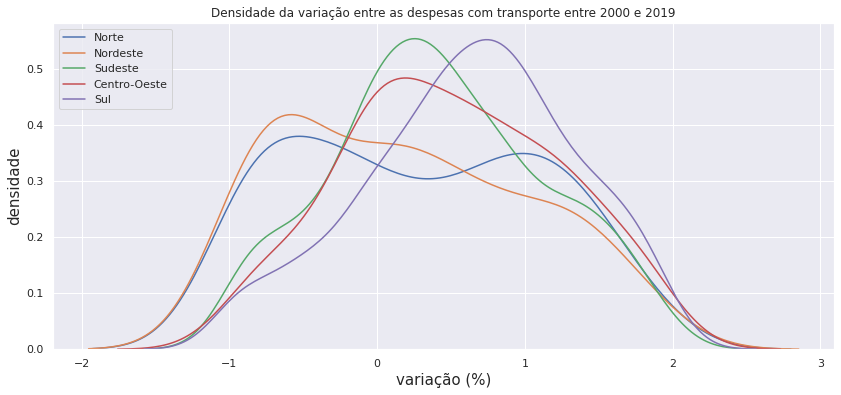

In [24]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_variacoes = df_crescimento[df_crescimento["UF"].isin(regioes[regiao])]["Variacao"]
    sns.kdeplot(regiao_variacoes)
plt.title("Densidade da variação entre as despesas com transporte entre 2000 e 2019")
plt.xlabel("variação (%)", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

#### Observação
Podemos notar que a região Sul foi a que mais concentrou aumento do percentual de despesas de 2000 para 2019. Enquanto a região Norte e Nordeste concentrou uma grande diminuição das suas despesas. As regiões Sudeste e Centro-Oeste tiveram, na maioria dos seus municípios, um aumento menor.